In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import Logit
from statsmodels.regression.linear_model import OLS

In [2]:
# We start from  life tables A and B from our Lecture 21 output (check updated version of the lecture's Jupyter Notebook)
df = pd.read_csv('life_table_A.csv', usecols=['month_all', 'y', 'l', 'n', 'h'])
df = df.head(len(df) - 1) # Last death of Arm A really changes the behavior of whole tail in an unreasonable way.
dfB = pd.read_csv('life_table_B.csv', usecols=['month_all', 'y', 'l', 'n', 'h'])

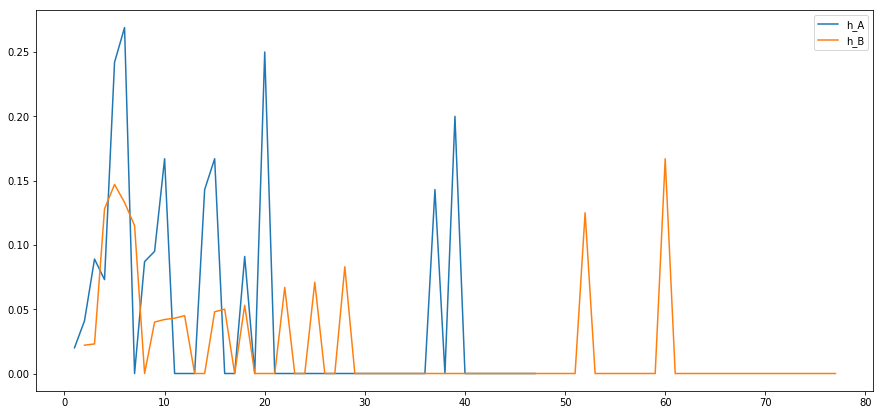

In [3]:
# First, let's plot the nonparametric estimates of the hazard rates
plt.figure(figsize=(15,7))
plt.plot(df['month_all'], df['h'])
plt.plot(dfB['month_all'], dfB['h'])
plt.legend(['h_A', 'h_B'])

In [11]:
# Now, let's run logistic regressions on both Arm A and B life tables using the knot at 11
knot_location = 11
df['x_const'] = 1
df['x_lin'] = df['month_all']
df['x_sq'] = df['month_all'].apply(lambda x: (x - knot_location) ** 2 if x <= knot_location else 0, 1)
df['x_cu'] = df['month_all'].apply(lambda x: (x - knot_location) ** 3 if x <= knot_location else 0, 1)

dfB['x_const'] = 1
dfB['x_lin'] = dfB['month_all']
dfB['x_sq'] = dfB['month_all'].apply(lambda x: (x - knot_location) ** 2 if x <= knot_location else 0, 1)
dfB['x_cu'] = dfB['month_all'].apply(lambda x: (x - knot_location) ** 3 if x <= knot_location else 0, 1)

X_design = df[['x_const', 'x_lin', 'x_sq', 'x_cu']]
lr_model1 = Logit(df['h'], X_design).fit()
df['h_hat_lr_A_11'] = lr_model1.predict()
lr_model2 = Logit(dfB['h'], dfB[['x_const', 'x_lin', 'x_sq', 'x_cu']]).fit()
dfB['h_hat_lr_B_11'] = lr_model2.predict()

Optimization terminated successfully.
         Current function value: 0.069414
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.025246
         Iterations 9


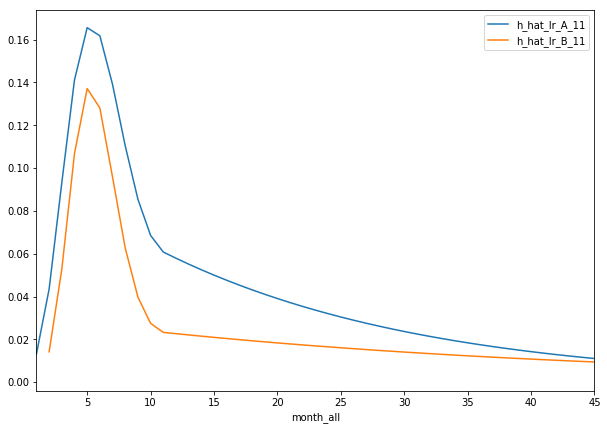

In [12]:
# Reproducing Figure 9.2 in the observed range
ax1 = df.head(len(df)-1).plot(x='month_all', y='h_hat_lr_A_11', figsize=(10,7))
dfB.plot(x='month_all', y='h_hat_lr_B_11', figsize=(10,7), ax=ax1, xlim=[1,45])

In [13]:
# Run logistic regressions on both Arm A and B life tables using the knot at 12
knot_location = 12
df['x_const'] = 1
df['x_lin'] = df['month_all']
df['x_sq'] = df['month_all'].apply(lambda x: (x - knot_location) ** 2 if x <= knot_location else 0, 1)
df['x_cu'] = df['month_all'].apply(lambda x: (x - knot_location) ** 3 if x <= knot_location else 0, 1)

dfB['x_const'] = 1
dfB['x_lin'] = dfB['month_all']
dfB['x_sq'] = dfB['month_all'].apply(lambda x: (x - knot_location) ** 2 if x <= knot_location else 0, 1)
dfB['x_cu'] = dfB['month_all'].apply(lambda x: (x - knot_location) ** 3 if x <= knot_location else 0, 1)

X_design = df[['x_const', 'x_lin', 'x_sq', 'x_cu']]
lr_model3 = Logit(df['h'], X_design).fit()
df['h_hat_lr_A_12'] = lr_model3.predict()

lr_model4 = Logit(dfB['h'], dfB[['x_const', 'x_lin', 'x_sq', 'x_cu']]).fit()
dfB['h_hat_lr_B_12'] = lr_model4.predict()

Optimization terminated successfully.
         Current function value: 0.069442
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.025220
         Iterations 9


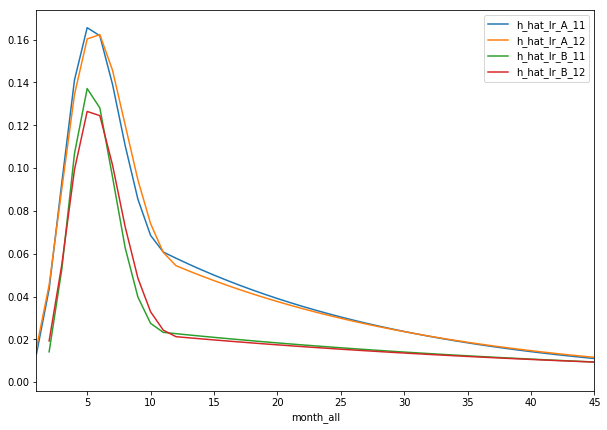

In [14]:
# We don't observe a dramatic change in the function estimates. 
ax1 = df.head(len(df)-1).plot(x='month_all', y='h_hat_lr_A_11', figsize=(10,7))
df.plot(x='month_all', y='h_hat_lr_A_12', figsize=(10,7), ax=ax1, xlim=[1,45])
dfB.plot(x='month_all', y='h_hat_lr_B_11', figsize=(10,7), ax=ax1, xlim=[1,45])
dfB.plot(x='month_all', y='h_hat_lr_B_12', figsize=(10,7), ax=ax1, xlim=[1,45])

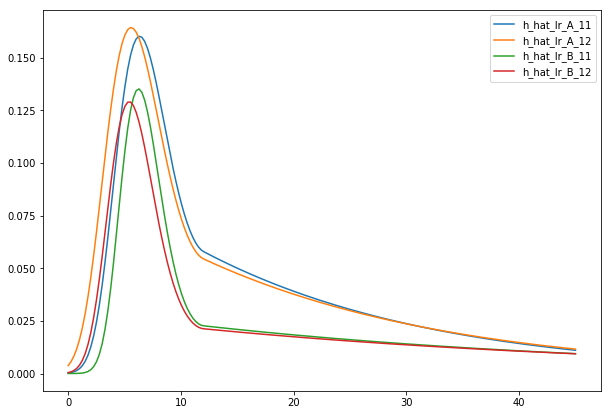

In [25]:
# However, after producing finer curve evaluations, we see that the knot choice at 12 makes the 
# hazard functions peak a bit earlier.
X_grid = pd.DataFrame({'x_const': 1, 'x_lin': np.linspace(0,45,180)})
X_grid['x_sq'] = X_grid['x_lin'].apply(lambda x: (x - knot_location) ** 2 if x <= knot_location else 0, 1)
X_grid['x_cu'] = X_grid['x_lin'].apply(lambda x: (x - knot_location) ** 3 if x <= knot_location else 0, 1)
plt.figure(figsize=(10,7))
plt.plot(X_grid['x_lin'], lr_model1.predict(X_grid), label='h_hat_lr_A_11')
plt.plot(X_grid['x_lin'], lr_model3.predict(X_grid), label='h_hat_lr_A_12')
plt.plot(X_grid['x_lin'], lr_model2.predict(X_grid), label='h_hat_lr_B_11')
plt.plot(X_grid['x_lin'], lr_model4.predict(X_grid), label='h_hat_lr_B_12')
plt.legend()